In [49]:
from pydub import AudioSegment
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import pandas as pd
from sklearn.metrics import confusion_matrix
import keras
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ConvLSTM2D, LSTM, Bidirectional
from keras.optimizers import sgd
import tensorflow as tf
import numpy as np
import itertools
import math

In [2]:
#Compute spectogram of each audio

SR = 22050
def get_short_time_fourier_transform(soundwave):
    return librosa.stft(soundwave, n_fft=256)

def short_time_fourier_transform_amplitude_to_db(stft):
    return librosa.amplitude_to_db(stft)

def soundwave_to_np_spectogram(soundwave):
    step1 = get_short_time_fourier_transform(soundwave)
    step2 = short_time_fourier_transform_amplitude_to_db(step1)
    step3 = step2/100
    return step3

def inspect_data(sound):
#    plt.figure()
#    plt.plot(sound)
#    IPython.display.display(IPython.display.Audio(sound, rate=SR))
    a = get_short_time_fourier_transform(sound)
    Xdb = short_time_fourier_transform_amplitude_to_db(a)
#    plt.figure()   
#    plt.imshow(Xdb)    
#    plt.show()
#    print (Xdb.shape)
#    print("Length per sample: %d, shape of spectogram: %s, max: %f min: %f" % (len(sound), str(Xdb.shape), Xdb.max(), Xdb.min()))
    return Xdb

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
#Creacion de las variables necesarias para la ejecucion del codigo

i = 0
j = 0
k = 0
number_list_train = ['']
number_list_test = ['']
file_count = 107
file_count2 = 35
input_array_train = ['']
phq8_array_train = ['']
input_array_train *= file_count
phq8_array_train *= file_count
number_list_train *= file_count
input_array_test = ['']
phq8_array_test = ['']
input_array_test *= file_count2
phq8_array_test *= file_count2
number_list_test *= file_count2

In [ ]:
#Abrir archivos de audio y segmentar por segmento de tiempo.
#Exportar los segmentos a otra carpeta para su posterior analisis


number = 0

l = 0
m = 0
      
data = open('C:/Users/Fran/Desktop/Database/datos1.txt', 'r', encoding='utf-8-sig')
for line in data:
    mylist = line.split(',')
    number = mylist[0]
    df = pd.read_csv('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' 
                     + str(number) + '_TRANSCRIPT.csv', header=0)
    while i < len (df):
        a = df.iloc[i].str.split()
        if a[0][2] == 'Participant' and j == 0: 
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba/' + str(number) + '.wav', format="wav")
            j = 1
        elif a[0][2] == 'Participant':
            
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba/' + str(number) + 'segmento.wav', format="wav")
            sound1 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(number) + '.wav')
            sound2 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(number) + 'segmento.wav')

            combined_sounds = sound1 + sound2
            combined_sounds.export('C:/Users/Fran/Desktop/prueba/' + str(number) + '.wav', format="wav")
        i += 1
             
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_train[l] = w
    number_list_train[l] = number
    phq8_array_train[l] = mylist[1]
    l += 1
    j = 0
    i = 0
    


In [ ]:
#Abrir archivos de audio y segmentar por segmento de tiempo.
#Exportar los segmentos a otra carpeta para su posterior analisis

i = 0
l = 0
m = 0
data1 = open('C:/Users/Fran/Desktop/Database/datos2_dev.txt', 'r', encoding='utf-8-sig')
for line in data1:
    mylist = line.split(',')
    number = mylist[0]
    df = pd.read_csv('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' 
                     + str(number) + '_TRANSCRIPT.csv', header=0)
    while i < len (df):
        a = df.iloc[i].str.split()
        if a[0][2] == 'Participant' and j == 0: 
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba_test/' + str(number) + '.wav', format="wav")
            j = 1
        elif a[0][2] == 'Participant':
            
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba_test/' + str(number) + 'segmento.wav', format="wav")
            sound1 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(number) + '.wav')
            sound2 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(number) + 'segmento.wav')

            combined_sounds = sound1 + sound2
            combined_sounds.export('C:/Users/Fran/Desktop/prueba_test/' + str(number) + '.wav', format="wav")
        i += 1
             
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_test[l] = w
    number_list_test[l] = number
    phq8_array_test[l] = mylist[1]
    l += 1
    j = 0
    i = 0 

In [4]:
#creacion de arrays, que seran usados despues para el entranamiento del modelo y creacion de espectogramas

l = 0
data = open('C:/Users/Fran/Desktop/Database/datos1.txt', 'r', encoding='utf-8-sig')
for line in data:
    mylist = line.split(',')
    number = mylist[0]
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_train[l] = w
    number_list_train[l] = number
    phq8_array_train[l] = mylist[1]
    l += 1
    
l = 0
data1 = open('C:/Users/Fran/Desktop/Database/datos2_dev.txt', 'r', encoding='utf-8-sig')
for line in data1:
    mylist = line.split(',')
    number = mylist[0]
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_test[l] = w
    number_list_test[l] = number
    phq8_array_test[l] = mylist[1]
    l += 1

In [5]:
#Calculo de la longitud de cada audio para en un futuro poder mover la ventana de tiempo 
#del minimo al maximo unos determinados segundos, de momento esta informacion no se utiliza
#y se calcula el segmento de audio con un tiempo fijo

len_list_train = ['']
len_list_test = ['']
len_list_train *= file_count
len_list_test *= file_count2
i = 0
j = 0


for audio_number in number_list_train:
    Audio_train = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(audio_number) + '.wav')
    len_list_train[i] = int(len(Audio_train) / (1000))
    i += 1
    
    
for audio_number in number_list_test:
    Audio_test = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(audio_number) + '.wav')
    len_list_test[j] = int(len(Audio_test) / (1000))
    j += 1
    


In [ ]:
minimun_audio_train = np.min(len_list_train)
minimun_audio_test = np.min(len_list_test)

In [5]:
#Creacion de los segmentos de audio para despues crear los espectogramas

t1_train_ini = 20 * 1000
t1_test_ini = 20 * 1000
t2_train_end = 45 * 1000
t2_test_end = 45 * 1000

for audio_number in number_list_train:
    Audio_train = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(audio_number) + '.wav')
    Audio_train = Audio_train[t1_train_ini:t2_train_end]
    Audio_train.export('C:/Users/Fran/Desktop/database_train/' + str(audio_number) + '.wav', format="wav")
    
    
for audio_number in number_list_test:
    Audio_test = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(audio_number) + '.wav')
    Audio_test = Audio_test[t1_train_ini:t2_train_end]
    Audio_test.export('C:/Users/Fran/Desktop/database_test/' + str(audio_number) + '.wav', format="wav")

In [6]:
#Spectograms of each segmented audio

i = 0
Xdb_train = ['']
Xdb_train_normalized = ['']
Xdb_train *= file_count
Xdb_train_normalized *= file_count

Xdb_test = ['']
Xdb_test_normalized = ['']
Xdb_test *= file_count2
Xdb_test_normalized *= file_count2

for audio_train in number_list_train:
    X, sr = librosa.load('C:/Users/Fran/Desktop/database_train/' + str(audio_train) + '.wav')
    Xdb_train[i] = inspect_data(X)
    #Xdb_train_normalized[i] = tf.log(tf.abs(Xdb_train[i]) + 0.01)
    i += 1

i = 0

for audio_test in number_list_test:
    X, sr = librosa.load('C:/Users/Fran/Desktop/database_test/' + str(audio_test) + '.wav')
    Xdb_test[i] = inspect_data(X)
    #Xdb_test_normalized[i] = tf.log(tf.abs(Xdb_test[i]) + 0.01)
    i += 1

C:\Users\Fran\Anaconda3\lib\site-packages\librosa\core\spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [7]:
#np.shape(Xdb_train_normalized[0])

In [11]:
ancho

8614

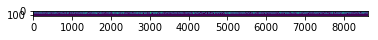

In [9]:
#Espectograma de 1 audio segmentado

plt.imshow(Xdb_train[0])
alto, ancho = np.shape(Xdb_train[0])

In [46]:
np.shape(Xdb_train)

(107, 129, 10336)

In [20]:
np.shape(Xdb_train_array)

(107, 1, 1111206)

In [27]:
phq8_array_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [12]:
#Creacion de los arrays, transformand el array para introducirlo en la red LSTM

Xdb_train_array = np.ndarray(shape = (107,alto,ancho))
Xdb_test_array = np.ndarray(shape = (35,alto,ancho))

i = 0
for train in Xdb_train:
    Xdb_train_array[i] = train
    i += 1
    
i = 0
for test in Xdb_test:
    Xdb_test_array[i] = test
    i += 1
    
Xdb_train_array = Xdb_train_array.reshape(107 ,alto*ancho)
Xdb_test_array = Xdb_test_array.reshape(35, alto*ancho)

Xdb_train_array = np.reshape(Xdb_train_array, (Xdb_train_array.shape[0], 1, Xdb_train_array.shape[1]))
Xdb_test_array = np.reshape(Xdb_test_array, (Xdb_test_array.shape[0], 1, Xdb_test_array.shape[1]))

In [21]:
#i= 0
#for audio_train in number_list_train:
#    Xdb_train[i] = Xdb_train[i].reshape(1333344,)
#    i += 1
    
#i= 0    
#for audio_test in number_list_test:
#    Xdb_test[i] = Xdb_test[i].reshape(1333344,)
#    i += 1

In [22]:
#Xdb_train_array=Xdb_train_array.reshape(Xdb_train_array.shape[0],Xdb_train_array.shape[1],1)

In [23]:
#Xdb_test_array=Xdb_test_array.reshape(Xdb_test_array.shape[0],Xdb_test_array.shape[1],1)

In [24]:
#np.shape(Xdb_train_array)

In [25]:
#num_classes = 2
#batch_size = 64
#epochs = 10

In [19]:
#Xdb_train_array = Xdb_train_array.reshape(Xdb_train_array.shape[0], alto, ancho, 1)
#Xdb_test_array = Xdb_test_array.reshape(Xdb_test_array.shape[0], alto, ancho, 1)

In [28]:
#print (Xdb_train_array.shape)
#print (Xdb_test_array.shape)

In [52]:
#seq = Sequential()
#seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                   input_shape=(107, 129, 1723, 1),
#                   padding='same', return_sequences=True))
#seq.add(BatchNormalization())

#seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                   padding='same', return_sequences=True))
#seq.add(BatchNormalization())

#seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                   padding='same', return_sequences=True))
#seq.add(BatchNormalization())

#seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                   padding='same', return_sequences=True))
#seq.add(BatchNormalization())

#seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
#               activation='sigmoid',
#               padding='same', data_format='channels_last'))
#seq.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
#Red neuronal

#model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(alto,ancho,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))

#model.summary()

#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])

In [ ]:
num_classes = 2
batch_size = 64
epochs = 10

# convert class vectors to binary class matrices
phq8_array_train = keras.utils.to_categorical(phq8_array_train, num_classes)
phq8_array_test = keras.utils.to_categorical(phq8_array_test, num_classes)

In [29]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True),
                        input_shape=(1, alto*ancho)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(),
              metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 256)            1138007040
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 1,138,179,778
Trainable params: 1,138,179,778
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(Xdb_train_array, phq8_array_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(Xdb_test_array, phq8_array_test))
score = model.evaluate(Xdb_test_array, phq8_array_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 107 samples, validate on 35 samples
Epoch 1/10
107/107 [==============================] - 294s 3s/step - loss: 0.6664 - acc: 0.5794 - val_loss: 0.6504 - val_acc: 0.6571
Epoch 2/10
107/107 [==============================] - 257s 2s/step - loss: 0.6246 - acc: 0.7103 - val_loss: 0.6460 - val_acc: 0.6571
Epoch 3/10
107/107 [==============================] - 234s 2s/step - loss: 0.5965 - acc: 0.7196 - val_loss: 0.6538 - val_acc: 0.6571
Epoch 4/10
107/107 [==============================] - 266s 2s/step - loss: 0.5813 - acc: 0.7196 - val_loss: 0.6520 - val_acc: 0.6571
Epoch 5/10
107/107 [==============================] - 236s 2s/step - loss: 0.5951 - acc: 0.7196 - val_loss: 0.6733 - val_acc: 0.6571
Epoch 6/10
107/107 [==============================] - 286s 3s/step - loss: 0.6080 - acc: 0.7196 - val_loss: 0.6729 - val_acc: 0.6571
Epoch 7/10
107/107 [==============================] - 281s 3s/step - loss: 0.5972 - acc: 0.7196 - val_loss: 0.6434 - val_acc: 0.6571
Epoch 8/10
107/107 [====

In [51]:
phq8_array_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [38]:
prediccion = model.predict(Xdb_test_array, batch_size=batch_size, verbose=1, steps=None)
for i in prediccion:
    print('Valor predicho:', i)

35/35 [==============================] - 3s 76ms/step
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7626601  0.23733997]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7613366  0.23866336]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7707407  0.22925933]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7606199  0.23938014]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7687864  0.23121361]
Valor predicho: [0.7606951 0.2393049]
Valor predicho: [0.7687864  

In [40]:
conf_matrix_pred = ['']
conf_matrix_pred *= 35
j = 0
for i in prediccion:
    conf_matrix_pred[j] = i.argmax(axis=0)
    print ("Clase: " + str(i.argmax(axis=0)))
    j += 1

Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0


In [41]:
conf_matrix_test = ['']
conf_matrix_test *= 35
j = 0
for i in phq8_array_test:
    conf_matrix_test[j] = i.argmax(axis=0)
    print ("Clase: " + str(i.argmax(axis=0)))
    j += 1

Clase: 0
Clase: 0
Clase: 0
Clase: 1
Clase: 1
Clase: 1
Clase: 1
Clase: 1
Clase: 0
Clase: 1
Clase: 1
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 1
Clase: 0
Clase: 1
Clase: 0
Clase: 1
Clase: 0
Clase: 0
Clase: 1
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 0
Clase: 1
Clase: 0
Clase: 0
Clase: 0
Clase: 0


In [46]:
cnf_matrix = confusion_matrix(conf_matrix_test,conf_matrix_pred)

Confusion matrix, without normalization
[[23  0]
 [12  0]]


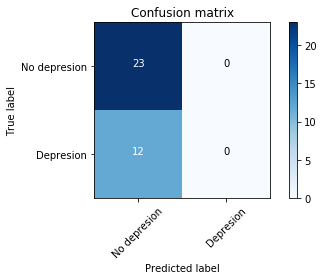

In [50]:
plot_confusion_matrix(cnf_matrix, classes=['No depresion','Depresion'],
                      title='Confusion matrix')